In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reading CSV File
df= pd.read_csv("C:/Users/avnit/Downloads/StatCanada.csv")
#Printing Header of the File
df.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,37146,NaN,NaN,NaN,0
1,1961-04,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38476,NaN,NaN,NaN,0
2,1961-07,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38871,NaN,NaN,NaN,0
3,1961-10,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38446,NaN,NaN,NaN,0
4,1962-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,39497,NaN,NaN,NaN,0


In [4]:
#Formatting Date in year and Month only
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')
# Changing header label from Reference Date to Reference Year to improvise analysis of Data
df["REF_YEAR"] = df["REF_DATE"].dt.year
# Cleaning 
clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()

C:\Users\avnit\AppData\Local\Temp\ipykernel_17472\1027629726.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()


In [5]:
clean_df.reset_index(inplace=True)
clean_df

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [6]:
# Identifying how many different rows in Estimates Column via unique function
clean_df["Estimates"].unique()

array(['Alcoholic beverages,  tobacco and cannabis [C12]',
       'Clothing and footwear [C13]', 'Communications [C18]',
       'Education [C21]', 'Food and non-alcoholic beverages [C11]',
       'Food, beverage and accommodation services [C22]',
       'Furnishings, household equipment and other goods and services related to the dwelling and property [C15]',
       'Health [C16]', 'Household final consumption expenditure [C]',
       'Housing, water, electricity, gas and other fuels [C14]',
       'Insurance and financial services [C23]',
       'Miscellaneous goods and services [C24]',
       'Net expenditure abroad [C25]', 'Recreation and culture [C19]',
       'Transport [C17]'], dtype=object)

In [7]:
#Removing extra column from data if it has any
clean_df[["REF_YEAR","Estimates","VALUE"]].head(20)

,REF_YEAR,Estimates,VALUE
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",59899
1,1961,Clothing and footwear [C13],31637
2,1961,Communications [C18],4147
3,1961,Education [C21],7312
4,1961,Food and non-alcoholic beverages [C11],152939
5,1961,"Food, beverage and accommodation services [C22]",84105
6,1961,"Furnishings, household equipment and other goo...",33064
7,1961,Health [C16],29625
8,1961,Household final consumption expenditure [C],749193
9,1961,"Housing, water, electricity, gas and other fue...",247124


In [8]:
#Renaming the column for better and easy referencing purpose
# Storing clean data frame in to new_clean_df
new_clean_df =clean_df.rename(columns={"REF_YEAR":"YEAR" , "Estimates": "Expenditures_(Millions_Dollars)"})
new_clean_df

,YEAR,Expenditures_(Millions_Dollars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [9]:
# Rectifying values for Housing,Water,Electricity,gas and other Fuel out of the main data set.
housing_df = new_clean_df.loc[new_clean_df["Expenditures_(Millions_Dollars)"] == "Housing, water, electricity, gas and other fuels [C14]"]
housing_df[["YEAR","Expenditures_(Millions_Dollars)","VALUE"]]

,YEAR,Expenditures_(Millions_Dollars),VALUE
9,1961,"Housing, water, electricity, gas and other fue...",247124
24,1962,"Housing, water, electricity, gas and other fue...",255494
39,1963,"Housing, water, electricity, gas and other fue...",264508
54,1964,"Housing, water, electricity, gas and other fue...",274751
69,1965,"Housing, water, electricity, gas and other fue...",284512
...,...,...,...
879,2019,"Housing, water, electricity, gas and other fue...",1135754
894,2020,"Housing, water, electricity, gas and other fue...",1165092
909,2021,"Housing, water, electricity, gas and other fue...",1198077
924,2022,"Housing, water, electricity, gas and other fue...",1229010


In [10]:
# To plot a bar graph rectifying two variables for Housing,water and fuel expences.
Year_Expenses = housing_df[["YEAR","VALUE"]]
Year_Expenses =Year_Expenses.set_index("YEAR")
Year_Expenses

,VALUE
YEAR,
1961,247124
1962,255494
1963,264508
1964,274751
1965,284512
...,...
2019,1135754
2020,1165092
2021,1198077


In [11]:
# Defining data for previous five years of Biggest Recession of 2008
Before_Recession_years = [2003,2004,2005,2006,2007,2008,2009]
Previous_Years_rows = Year_Expenses.loc[Before_Recession_years]
Previous_Years_rows

,VALUE
YEAR,
2003,717346
2004,740335
2005,764362
2006,784693
2007,815008
2008,840328
2009,863496


<IPython.core.display.Javascript object>


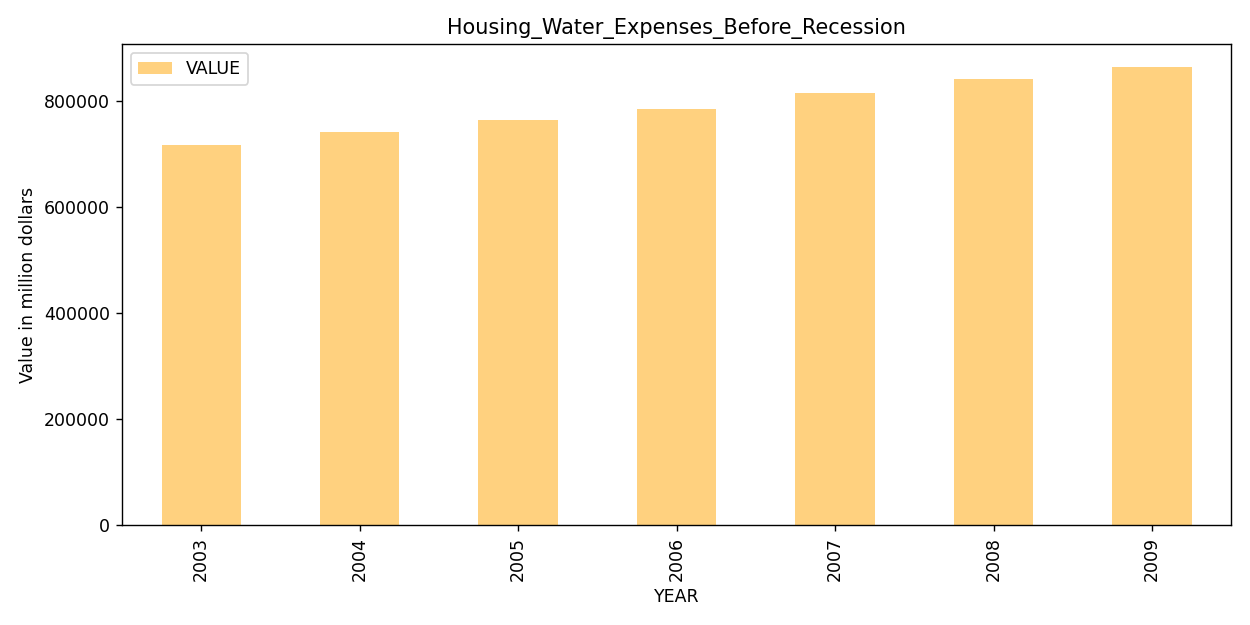

In [12]:
Previous_Years_rows.plot(kind="bar", figsize=(10,5),color="Orange",alpha=0.5)

# Set a X and Y Axis title for the chart
plt.title("Housing_Water_Expenses_Before_Recession")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Previous_Years_rows.png")
plt.show()
plt.tight_layout()

In [13]:
After_Recession_years = [2010,2011,2012,2013,2014,2015]
Next_Years_rows = Year_Expenses.loc[After_Recession_years]
Next_Years_rows

,VALUE
YEAR,
2010,886404
2011,913482
2012,934804
2013,963314
2014,991469
2015,1019481


<IPython.core.display.Javascript object>


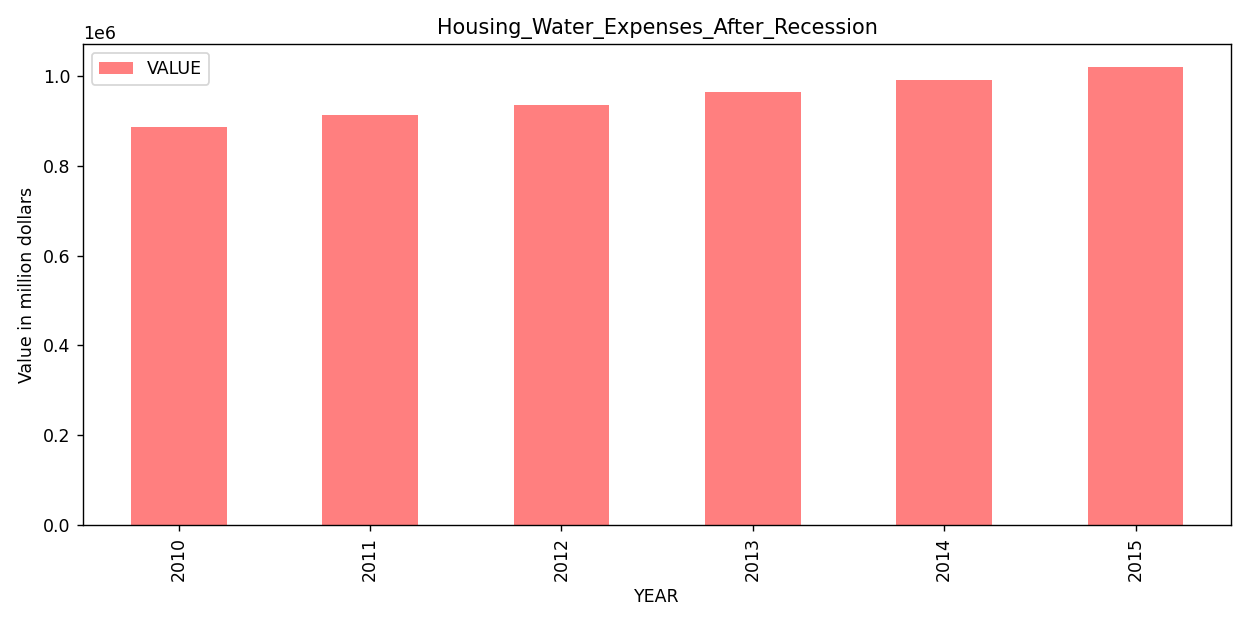

In [14]:
Next_Years_rows.plot(kind="bar", figsize=(10,5),color="Red",alpha=0.5)
# Set a title for the chart
plt.title("Housing_Water_Expenses_After_Recession")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Next_Years_rows.png")
plt.show()
plt.tight_layout()

In [15]:
Before_Recession_years = Previous_Years_rows["VALUE"].sum()
percentage_change = (Before_Recession_years*100)/7
percentage_change

78936685.71428572

In [16]:
Previous_Years_rows["VALUE"] = (Previous_Years_rows["VALUE"] / Previous_Years_rows["VALUE"].sum()) * 100
Previous_Years_rows

,VALUE
YEAR,
2003,12.982303
2004,13.398351
2005,13.833184
2006,14.201128
2007,14.749760
2008,15.207993
2009,15.627280


In [17]:

# Calculate the percentage increase between the first and last years
first_value = Previous_Years_rows["VALUE"].iloc[0]
last_value = Previous_Years_rows["VALUE"].iloc[-1]
percentage_increase = ((last_value - first_value) / first_value) * 100
# Display the percentage increase
print(f"The percentage increase between the 2003 and 2009 is: {percentage_increase:.2f}%")


The percentage increase between the 2003 and 2009 is: 20.37%


In [18]:
Next_Years_rows["VALUE"] = (Next_Years_rows["VALUE"] / Next_Years_rows["VALUE"].sum()) * 100
Next_Years_rows

,VALUE
YEAR,
2010,15.526557
2011,16.000865
2012,16.374348
2013,16.873739
2014,17.366912
2015,17.857580


In [19]:
# Calculate the percentage increase between the first and last years
first_value = Next_Years_rows["VALUE"].iloc[0]
last_value = Next_Years_rows["VALUE"].iloc[-1]
percentage_increase = ((last_value - first_value) / first_value) * 100
# Display the percentage increase
print(f"The percentage increase between the 2010 and 2015 is: {percentage_increase:.2f}%")

The percentage increase between the 2010 and 2015 is: 15.01%
